In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import email
import os
import numpy as np
import pandas as pd
import tarfile

# 解压数据

In [6]:
def extract_file(tar_path,extract_path):
  '''
  将tgz文件解压到指定的目录
  tra_path:需要解压的tgz文件路径
  extract_path:将文件解压的路径
  '''
  # 如果解压路径不存在，创建目录
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)

  # 以只读的方式，打开tar文件

  try:
    # 'r:gz" 中，r表示只读，gz表示tgz文件格式
    with tarfile.open(tar_path,'r:gz') as tar:
      # 将tar文件解压到指定路径
      tar.extractall(extract_path)
  # 如果出现错误，将错误打印出来
  except Exception as e:
    print(f'Error:{e}')

# 不要将文件解压到谷歌云盘，否则读取速度会非常慢
extract_file(r'E:\Mai\data\trec06c.tgz',r'E:\Mai\Data_2025')

# 读取邮件标签

In [7]:
def read_label(full_name):
  '''
  从文件中，读取所有邮件的标签信息

  parameters
  ------------
  full_name:str
  要读取文件的完整路径名称

  return:
  ------------
  lable:dict
  格式为{key=文件路径：value=邮件标签}
  '''
  data = pd.read_csv(full_name,header=None,sep=' ')
  data.columns = ['label','path']
  data['label'] = np.where(data['label'] == 'spam',0,1)
  data['path'] = data['path'].str.replace('../data/','')
  data.set_index('path',inplace = True)
  return data['label'].to_dict()

label = read_label(r'E:\Mai\Data_2025\trec06c\full\index')


In [8]:
label['003/097']


1

In [9]:
label['000/003']

0

# 读取邮件正文

In [10]:
def parse_content(full_name):
  '''
  从文件中解析邮件正文内容
  有些邮件信息中，存在特殊字符，不能使用任何编码进行解析，解决方式：
  尝试使用gb2312来进行解码。如果出现错误，则删除不能解码的字符区间，重新解码，直到解析成功为止

  parameter：
  full_name:str
  文件名的完整路径


  return:
  content:str
  邮件的正文内容
  '''
  with open(full_name,mode = 'rb') as file:
    # 将文件放入一个可变字节数组中，便于后续操作
    content = bytearray(file.read())
    while True:
      try:
        text = content.decode('gb2312')
        #如果解码成功，则说明不包含乱码，循环结束
        break
      except UnicodeDecodeError as e:
        # e:args记录错误的相关信息，为tuple类型，包含五个元素
        # e.args[0]：编码名称
        # e.args[1]：字节内容
        # e.args[2]：错误的开始位置
        # e.args[3]：错误的结束位置
        # e.args[4]：错误的原因描述

        # 如果解码失败，删除不能解码的字符区间
        del content[e.args[2]:e.args[3]]

    # 从参数指定的字符串中，解析消息对象
    msg = email.message_from_string(text)
    return msg.get_payload()

def read_text(root_dir):
  '''
  从给定文档根目录读取所有文档
  parameter:
  root_dir:str
  -----------
  return:
  all_text:dict
  格式为{'文件路径：正文内容}
  '''
  all_data = {}
  for dir_name in os.listdir(root_dir):
      file_path = os.path.join(root_dir, dir_name)
      print('正在处理:',dir_name)
      for file_name in os.listdir(file_path):
        file_dir = os.path.join(file_path,file_name)
        text = parse_content(file_dir)
        all_data[dir_name+'/'+file_name] = text

  return all_data

In [11]:
text = read_text(r'E:\Mai\Data_2025\trec06c\data')

正在处理: 000
正在处理: 001
正在处理: 002
正在处理: 003
正在处理: 004
正在处理: 005
正在处理: 006
正在处理: 007
正在处理: 008
正在处理: 009
正在处理: 010
正在处理: 011
正在处理: 012
正在处理: 013
正在处理: 014
正在处理: 015
正在处理: 016
正在处理: 017
正在处理: 018
正在处理: 019
正在处理: 020
正在处理: 021
正在处理: 022
正在处理: 023
正在处理: 024
正在处理: 025
正在处理: 026
正在处理: 027
正在处理: 028
正在处理: 029
正在处理: 030
正在处理: 031
正在处理: 032
正在处理: 033
正在处理: 034
正在处理: 035
正在处理: 036
正在处理: 037
正在处理: 038
正在处理: 039
正在处理: 040
正在处理: 041
正在处理: 042
正在处理: 043
正在处理: 044
正在处理: 045
正在处理: 046
正在处理: 047
正在处理: 048
正在处理: 049
正在处理: 050
正在处理: 051
正在处理: 052
正在处理: 053
正在处理: 054
正在处理: 055
正在处理: 056
正在处理: 057
正在处理: 058
正在处理: 059
正在处理: 060
正在处理: 061
正在处理: 062
正在处理: 063
正在处理: 064
正在处理: 065
正在处理: 066
正在处理: 067
正在处理: 068
正在处理: 069
正在处理: 070
正在处理: 071
正在处理: 072
正在处理: 073
正在处理: 074
正在处理: 075
正在处理: 076
正在处理: 077
正在处理: 078
正在处理: 079
正在处理: 080
正在处理: 081
正在处理: 082
正在处理: 083
正在处理: 084
正在处理: 085
正在处理: 086
正在处理: 087
正在处理: 088
正在处理: 089
正在处理: 090
正在处理: 091
正在处理: 092
正在处理: 093
正在处理: 094
正在处理: 095
正在处理: 096
正在处理: 097
正在处理: 098
正在处理: 099


In [12]:
# 设置检查函数
def check_index(text,label):
    '''
    检查text与label的标签是否对应
    ---------------------------
    parameters:
    text:dict
    格式为：{'文件路径':正文}
    label:dict
    格式为：{'文件路径':标签}
    '''
    if set(text.keys()) != set(label.keys()):
        raise ValueError('text与label长度不一致')
    
check_index(text,label)

In [13]:
def write_file(path,text,label):
    '''
    将文件的正文与标签写入文件中
    -----------------------------
    parameter:
    path:文件储存路径
    text:
    label:
    -----------------------------
    return:
    
    '''
    df = pd.DataFrame({'text':text,'label':label})
    df.to_csv(path,index=False)

write_file(r'E:\Mai\Data_2025\mail.csv',text,label)

# 文本预处理

In [14]:
data = pd.read_csv(r'E:\Mai\Data_2025\mail.csv',header=0)

In [15]:
data.head(10)

,text,label
0,\n 非财务纠淼牟莆窆芾-（沙盘模拟）\n\n ...,0
1,讲的是孔子后人的故事。一个老领导回到家乡，跟儿子感情不和，跟贪财的孙子孔为本和睦。\n老领导...,1
2,尊敬的贵公司(财务/经理)负责人您好！ \n 我是深圳金海实业有限公司（广州...,0
3,贵公司负责人(经理/财务）您好： \n 深圳市华龙公司受多家公司委托向外低点代开部分增...,0
4,这是一封HTML格式信件！\n\n-----------------------------...,0
5,\nTO：贵公司经理、财务\n\n \n 您好！ \n 深圳市春洋贸易有...,0
6,那他为什么不愿意起诉，既然这样了！起诉后也有充分的理由！\nMM莫不是还生活在电影中，个人认...,1
7,尊敬的负责人（经理／财务）：您好！\n \n 我是深圳伟仕嘉贸易有公司：兴办贸易...,0
8,"\n 您好,以下是特别为阁下发的香港信息(图片、景点、BBS等),不知道阁下是否喜\n ...",0
9,我觉得，负债不要紧，最重要的是能负得起这个责任来，\n欠了那么多钱，至少对当初拿出爱心来的网...,1


In [16]:
# 数据检视
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64620 entries, 0 to 64619
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    64616 non-null  object
 1   label   64620 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1009.8+ KB


# 分词

In [17]:
import jieba
s = '今天外面下了一场大雨'
# cut与lcut的区别：cut是一个生成器，后者返回列表。
words = jieba.cut(s)
print(words)
print(list(words))
words = jieba.lcut(s)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\78115\AppData\Local\Temp\jieba.cache


<generator object Tokenizer.cut at 0x000001C9BB856EA0>


Loading model cost 0.615 seconds.
Prefix dict has been built successfully.


['今天', '外面', '下', '了', '一场', '大雨']
['今天', '外面', '下', '了', '一场', '大雨']


In [ ]:
# 1、缺失信息
# 2、分词
# 3、文本内容清洗
# 4、去除停用词

import re
def get_stopword():
    '''
    获取所有的停用词
    return:
    s:set
    '''
    # 为什么使用set,因为时间复杂度。list为O(n),而set采用hashmap,时间复杂度为O(1)
    s = set()
    with open(r'E:\Mai\Data_2025\stopword.txt',encoding='utf-8') as f:
        for i in f:
            s.add(i.strip)
    return s

def text_precess(data):
    ''' 
    对文本进行清洗：
    1、删除缺失值
    2、分词
    3、去除特殊字符
    4、去除停用词
    '''
    def inner_precess(text):
        words = jieba.cut(text)
        return [word for word in words if (not re_obj.search(word)) and (word not in stopword)]
    

    data.dropna(inplace=True)
    re_obj = re.compile(r'[❤-❥(웃-유)♋☮✌☏[☢/☠✔ -☑♚／:▲♪✈✞÷↑\s↓◆◇⊙\\■□△▽¿─│♥/❣♂♀☿Ⓐ✍✉☣☤✘☒♛▼♫⌘☪≈←→◈◎☉★☆⊿※¡━┃♡ღツ☼☁❅♒✎©®™Σ✪✯☭➳卐√↖↗●◐Θ◤◥︻〖〗┄┆℃℉°✿ϟ☃☂✄¢€£∞✫★½✡×↙↘○◑⊕◣◢︼【】┅┇☽☾✚〓▂▃▄▅▆▇█▉▊▋▌▍▎▏↔↕☽☾の•▸◂▴▾┈┊①②③④⑤⑥⑦⑧⑨⑩ⅠⅡⅢⅣⅤⅥⅦⅧⅨⅩ㍿▓♨♛❖♓☪✙┉┋☹☺☻تヅツッシÜϡﭢ™℠℗©®♥❤❥❣❦❧♡۵웃유ღ♋♂♀☿☼☀☁☂☄☾☽❄☃☈⊙☉℃℉❅✺ϟ☇♤♧♡♢♠♣♥♦☜☞☝✍☚☛☟✌✽✾✿❁❃❋❀⚘☑✓✔√☐☒✗✘ㄨ✕✖✖⋆✢✣✤✥❋✦✧✩✰✪✫✬✭✮✯❂✡★✱✲✳✴✵✶✷✸✹✺✻✼❄❅❆❇❈❉❊†☨✞✝☥☦☓☩☯☧☬☸✡♁✙♆。，、＇：∶；?‘’“”〝〞ˆˇ﹕︰﹔﹖﹑•¨….¸;！´？！～—ˉ｜‖＂〃｀@﹫¡¿﹏﹋﹌︴々﹟#﹩$﹠&﹪%*﹡﹢﹦﹤‐￣¯―﹨ˆ˜﹍﹎+=<＿_-\ˇ~﹉﹊（）〈〉‹›﹛﹜『』〖〗［］《》〔〕{}「」【】︵︷︿︹︽_﹁﹃︻︶︸﹀︺︾ˉ﹂﹄︼☩☨☦✞✛✜✝✙✠✚†‡◉○◌◍◎●◐◑◒◓◔◕◖◗❂☢⊗⊙◘◙◍⅟½⅓⅕⅙⅛⅔⅖⅚⅜¾⅗⅝⅞⅘≂≃≄≅≆≇≈≉≊≋≌≍≎≏≐≑≒≓≔≕≖≗≘≙≚≛≜≝≞≟≠≡≢≣≤≥≦≧≨≩⊰⊱⋛⋚∫∬∭∮∯∰∱∲∳%℅‰‱㊣㊎㊍㊌㊋㊏㊐㊊㊚㊛㊤㊥㊦㊧㊨㊒㊞㊑㊒㊓㊔㊕㊖㊗㊘㊜㊝㊟㊠㊡㊢㊩㊪㊫㊬㊭㊮㊯㊰㊙㉿囍♔♕♖♗♘♙♚♛♜♝♞♟ℂℍℕℙℚℝℤℬℰℯℱℊℋℎℐℒℓℳℴ℘ℛℭ℮ℌℑℜℨ♪♫♩♬♭♮♯°øⒶ☮✌☪✡☭✯卐✐✎✏✑✒✍✉✁✂✃✄✆✉☎☏➟➡➢➣➤➥➦➧➨➚➘➙➛➜➝➞➸♐➲➳⏎➴➵➶➷➸➹➺➻➼➽←↑→↓↔↕↖↗↘↙↚↛↜↝↞↟↠↡↢↣↤↥↦↧↨➫➬➩➪➭➮➯➱↩↪↫↬↭↮↯↰↱↲↳↴↵↶↷↸↹↺↻↼↽↾↿⇀⇁⇂⇃⇄⇅⇆⇇⇈⇉⇊⇋⇌⇍⇎⇏⇐⇑⇒⇓⇔⇕⇖⇗⇘⇙⇚⇛⇜⇝⇞⇟⇠⇡⇢⇣⇤⇥⇦⇧⇨⇩⇪➀➁➂➃➄➅➆➇➈➉➊➋➌➍➎➏➐➑➒➓㊀㊁㊂㊃㊄㊅㊆㊇㊈㊉ⒶⒷⒸⒹⒺⒻⒼⒽⒾⒿⓀⓁⓂⓃⓄⓅⓆⓇⓈⓉⓊⓋⓌⓍⓎⓏⓐⓑⓒⓓⓔⓕⓖⓗⓘⓙⓚⓛⓜⓝⓞⓟⓠⓡⓢⓣⓤⓥⓦⓧⓨⓩ⒜⒝⒞⒟⒠⒡⒢⒣⒤⒥⒦⒧⒨⒩⒪⒫⒬⒭⒮⒯⒰⒱⒲⒳⒴⒵ⅠⅡⅢⅣⅤⅥⅦⅧⅨⅩⅪⅫⅬⅭⅮⅯⅰⅱⅲⅳⅴⅵⅶⅷⅸⅹⅺⅻⅼⅽⅾⅿ┌┍┎┏┐┑┒┓└┕┖┗┘┙┚┛├┝┞┟┠┡┢┣┤┥┦┧┨┩┪┫┬┭┮┯┰┱┲┳┴┵┶┷┸┹┺┻┼┽┾┿╀╁╂╃╄╅╆╇╈╉╊╋╌╍╎╏═║╒╓╔╕╖╗╘╙╚╛╜╝╞╟╠╡╢╣╤╥╦╧╨╩╪╫╬◤◥◄►▶◀◣◢▲▼◥▸◂▴▾△▽▷◁⊿▻◅▵▿▹◃❏❐❑❒▀▁▂▃▄▅▆▇▉▊▋█▌▍▎▏▐░▒▓▔▕■□▢▣▤▥▦▧▨▩▪▫▬▭▮▯㋀㋁㋂㋃㋄㋅㋆㋇㋈㋉㋊㋋㏠㏡㏢㏣㏤㏥㏦㏧㏨㏩㏪㏫㏬㏭㏮㏯㏰㏱㏲㏳㏴㏵㏶㏷㏸㏹㏺㏻㏼㏽㏾㍙㍚㍛㍜㍝㍞㍟㍠㍡㍢㍣㍤㍥㍦㍧㍨㍩㍪㍫㍬㍭㍮㍯㍰㍘☰☲☱☴☵☶☳☷☯]')
    stopword = get_stopword()
    data['text'] = data['text'].apply(inner_precess)

text_precess(data)
data.head()

,text,label
0,"[非, 财务, 纠淼, 牟, 莆, 窆, 芾, 沙盘, 模拟, 如何, 运用, 财务, 岳,...",0
1,"[讲, 的, 是, 孔子, 后人, 的, 故事, 一个, 老, 领导, 回到, 家乡, 跟,...",1
2,"[尊敬, 的, 贵, 公司, 财务, 经理, 负责人, 您好, 我, 是, 深圳, 金海, ...",0
3,"[贵, 公司, 负责人, 经理, 财务, 您好, 深圳市, 华龙, 公司, 受, 多家, 公...",0
4,"[这是, 一封, 格式, 信件, 广告, 网络电话, 包年, 卡, 元, 长途, 市话, 全...",0


In [20]:
# 处理后的文本存入文件
data.to_csv(r'E:\Mai\Data_2025\text.csv',index = False)

# 文本分析

In [21]:
data = pd.read_csv(r'E:\Mai\Data_2025\text.csv',header=0)

In [22]:
# 读取新的数据后，变为了字符串，
data.head(5)

,text,label
0,"['非', '财务', '纠淼', '牟', '莆', '窆', '芾', '沙盘', '模...",0
1,"['讲', '的', '是', '孔子', '后人', '的', '故事', '一个', '...",1
2,"['尊敬', '的', '贵', '公司', '财务', '经理', '负责人', '您好'...",0
3,"['贵', '公司', '负责人', '经理', '财务', '您好', '深圳市', '华...",0
4,"['这是', '一封', '格式', '信件', '广告', '网络电话', '包年', '...",0


In [23]:
# 需要重新处理
data.text = data.text.apply(lambda x: eval(x))
data.head(5)

,text,label
0,"[非, 财务, 纠淼, 牟, 莆, 窆, 芾, 沙盘, 模拟, 如何, 运用, 财务, 岳,...",0
1,"[讲, 的, 是, 孔子, 后人, 的, 故事, 一个, 老, 领导, 回到, 家乡, 跟,...",1
2,"[尊敬, 的, 贵, 公司, 财务, 经理, 负责人, 您好, 我, 是, 深圳, 金海, ...",0
3,"[贵, 公司, 负责人, 经理, 财务, 您好, 深圳市, 华龙, 公司, 受, 多家, 公...",0
4,"[这是, 一封, 格式, 信件, 广告, 网络电话, 包年, 卡, 元, 长途, 市话, 全...",0


# 标签统计

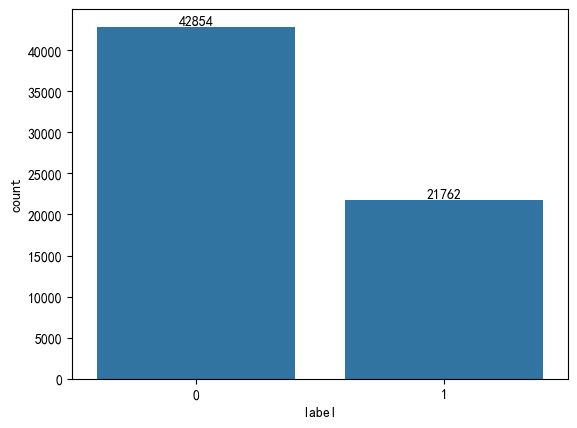

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns

# 注意设置字体,如果没有安装simhei,需要先安装字体
# font_manager.fontManager.addfont('path')
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


a = sns.countplot(x = data.label)
for container in a.containers:
    a.bar_label(container)


# 词频统计

In [27]:
from itertools import chain
from collections import Counter

li_2d = data.text.to_list()
# 将二维数组转化为一维数组
li_1d= list(chain.from_iterable(li_2d))
print('总词汇量',len(li_1d))

c = Counter(li_1d)
print('不重复的词汇数量:',len(c))
common = c.most_common(15)
print(common)


总词汇量 16963747
不重复的词汇数量: 152594
[('的', 939191), ('我', 230090), ('了', 185936), ('是', 173433), ('在', 139934), ('你', 127586), ('和', 119631), ('公司', 114780), ('有', 113022), ('与', 81673), ('他', 76834), ('人', 75482), ('不', 73797), ('就', 71517), ('管理', 70074)]


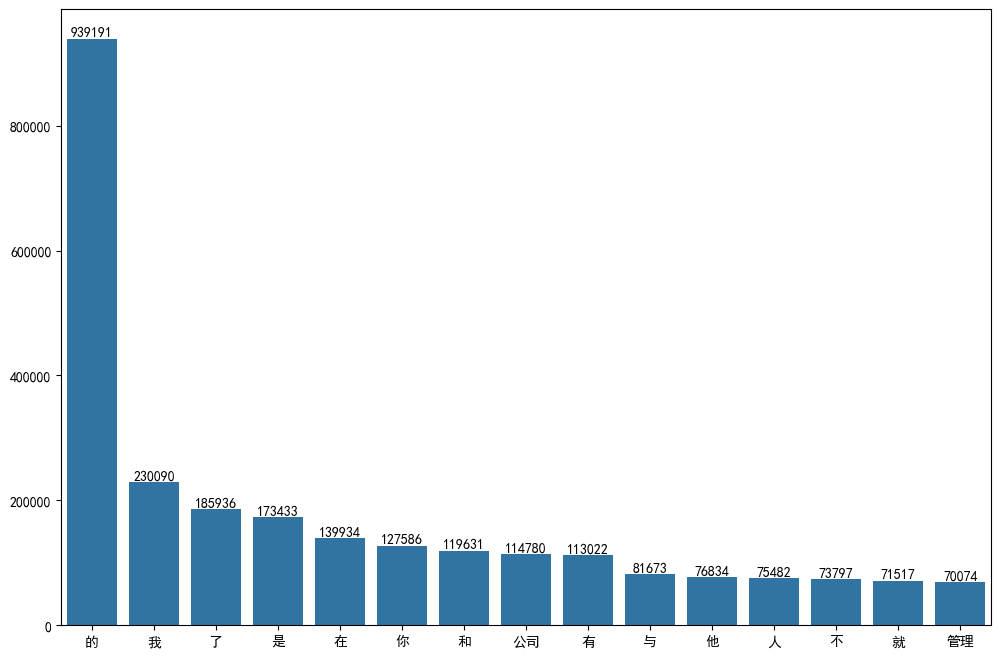

In [34]:
d = dict(common)
plt.figure(figsize=(12,8))
a = sns.barplot(x = d.keys(),y = d.values())
for container in a.containers:
    a.bar_label(container)



In [39]:
c.values()

dict_values([2168, 16145, 311, 191, 279, 154, 744, 308, 1671, 28692, 3634, 932, 90, 387, 72, 554, 238, 2603, 1969, 784, 528, 4769, 2015, 70074, 119631, 718, 63221, 2356, 15042, 1094, 622, 16264, 17318, 1349, 3532, 51859, 119, 939191, 6676, 5627, 819, 52575, 326, 872, 520, 21945, 83, 265, 111, 171, 3692, 4965, 23640, 148, 81673, 4778, 564, 8277, 236, 4878, 14530, 1844, 9142, 367, 5717, 173, 1994, 9389, 208, 31883, 14492, 13324, 12453, 22749, 62720, 524, 4780, 2065, 3892, 4540, 26790, 1917, 1532, 219, 9032, 63156, 45203, 1154, 113022, 4802, 9949, 6272, 1031, 8587, 535, 3742, 3086, 1075, 15391, 4026, 4245, 2804, 281, 105, 872, 181, 192, 116, 92, 110, 143, 1875, 373, 3462, 3301, 2269, 1138, 4702, 3008, 448, 239, 382, 15340, 515, 16793, 37190, 9637, 35812, 2366, 199, 6355, 5865, 2466, 1735, 6541, 1984, 490, 324, 918, 88, 959, 137, 3257, 583, 144, 2283, 3774, 8708, 184, 1482, 1343, 936, 650, 2807, 6305, 1587, 10025, 12504, 183, 3148, 394, 375, 322, 332, 78, 7127, 3458, 139934, 34811, 182, 35

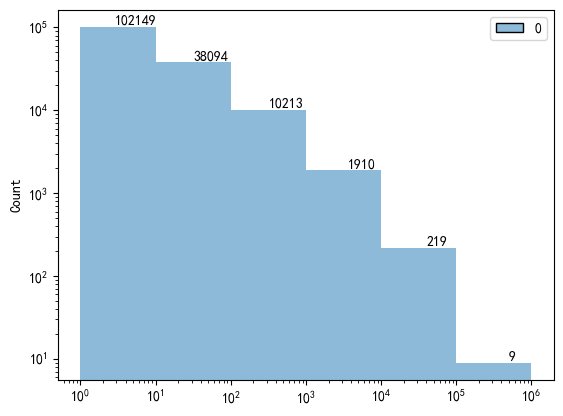

In [ ]:
plt.Figure(figsize=(12,5))
# 横轴为一个词汇出现的频率，纵轴为出现在bins内的频率的统计
a = sns.histplot(c.values(),bins=np.logspace(0,6,num=7))
for container in a.containers:
    a.bar_label(container)
a.set_xscale('log')
a.set_yscale('log')
# 反映了，高频词汇占比较小，而低频词汇占比较高

# 用词统计

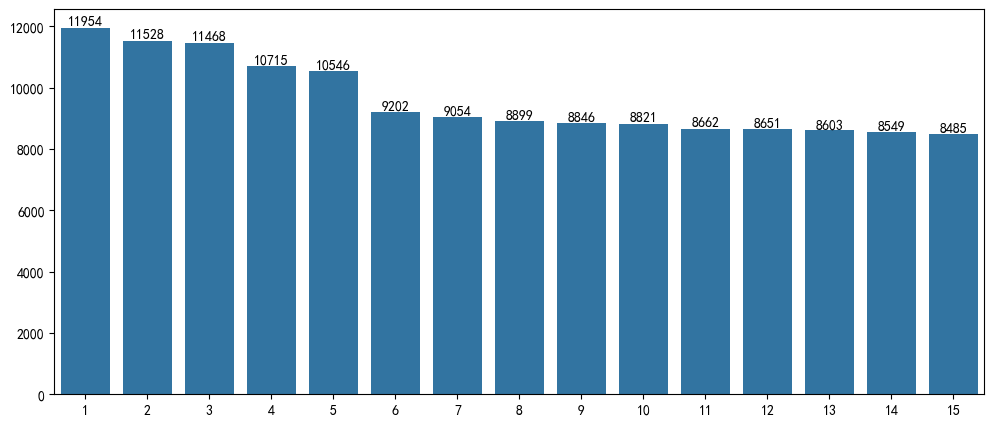

In [60]:
plt.figure(figsize = (12,5))

# 计算每个邮件用词数
nums = [len(li) for li in li_2d]

# 统计用词做多的15个邮件
length = 15
a = sns.barplot(x = np.arange(1,length+1),y = sorted(nums,reverse=True)[:length])
for container in a.containers:
    a.bar_label(container)

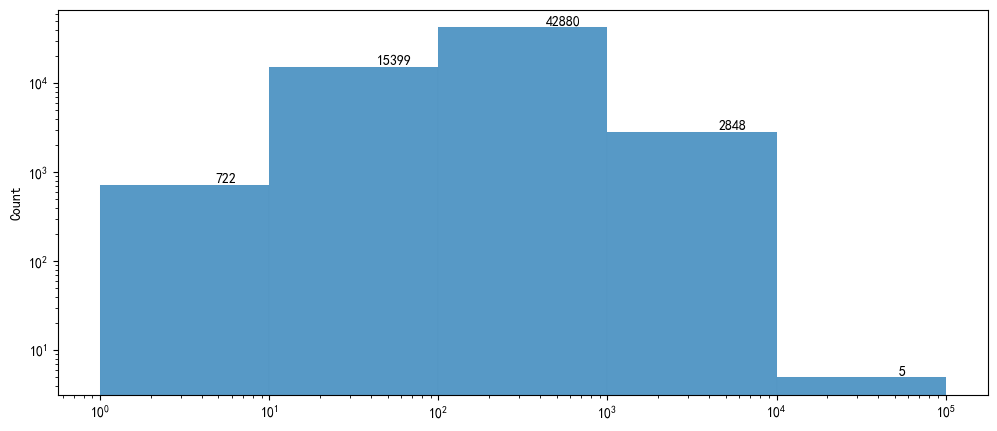

In [62]:
plt.figure(figsize = (12,5))
a = sns.histplot(x = nums,bins=np.logspace(0,5,num=6))
for container in a.containers:
    a.bar_label(container)
a.set_xscale('log')
a.set_yscale('log')

# 文本向量化

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
# 词袋模型，适合入门文本任务。

count = CountVectorizer()
docs = [
    'Where there is a will,there is a way',
    'There is no royal to learning'

]

bag = count.fit_transform(docs)
# bag是一个稀疏的数组
print(bag)
# 调用toarray方法，可以转化为ndarray
print(bag.toarray())
# 获取每个特征对应的单词
print(count.get_feature_names_out())
# 输出单词与索引的映射关系
print(count.vocabulary_)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (2, 9)>
  Coords	Values
  (0, 7)	1
  (0, 4)	2
  (0, 0)	2
  (0, 8)	1
  (0, 6)	1
  (1, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 5)	1
  (1, 1)	1
[[2 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 0 0 0]]
['is' 'learning' 'no' 'royal' 'there' 'to' 'way' 'where' 'will']
{'where': 7, 'there': 4, 'is': 0, 'will': 8, 'way': 6, 'no': 2, 'royal': 3, 'to': 5, 'learning': 1}


In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
# TF-IdF
# TF,词频，一个单词在文档中出现的频率
# IDF，逆文档频率（在别的文档中出现的频率）
docs = [
    'Where there is a will,there is a way',
    'There is no royal to learning'
]
# 词向量化
count = CountVectorizer()
bag = count.fit_transform(docs)
# 设置词重要度权重
tfidf = TfidfTransformer()
t = tfidf.fit_transform(bag)

print(t.toarray())

[[0.53594084 0.         0.         0.         0.53594084 0.
  0.37662308 0.37662308 0.37662308]
 [0.31779954 0.44665616 0.44665616 0.44665616 0.31779954 0.44665616
  0.         0.         0.        ]]


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

ftidfv = TfidfVectorizer()
ft = ftidfv.fit_transform(docs)
print(ft.toarray())

[[0.53594084 0.         0.         0.         0.53594084 0.
  0.37662308 0.37662308 0.37662308]
 [0.31779954 0.44665616 0.44665616 0.44665616 0.31779954 0.44665616
  0.         0.         0.        ]]


# n-gram

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    'Where there is a will,there is a way',
    'There is no royal to learning'
]
# (1,2)表示不仅使用一元组，也是用二元组
# (1,1)表示仅使用一元组
# (1,3)表示使用1，2，3元组
tfidf = TfidfVectorizer(ngram_range=(2,3))
t = tfidf.fit_transform(docs)
print(t.toarray())
print(tfidf.get_feature_names_out())

[[0.         0.         0.30116963 0.30116963 0.30116963 0.
  0.         0.         0.         0.42856935 0.         0.30116963
  0.30116963 0.         0.30116963 0.30116963 0.30116963 0.30116963]
 [0.34287126 0.34287126 0.         0.         0.         0.34287126
  0.34287126 0.34287126 0.34287126 0.24395573 0.34287126 0.
  0.         0.34287126 0.         0.         0.         0.        ]]
['is no' 'is no royal' 'is way' 'is will' 'is will there' 'no royal'
 'no royal to' 'royal to' 'royal to learning' 'there is' 'there is no'
 'there is way' 'there is will' 'to learning' 'where there'
 'where there is' 'will there' 'will there is']


In [76]:
from sklearn.model_selection import train_test_split

X = data['text'].str.join(' ')
y = data['label']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [77]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import ComplementNB

# 使用词频最多的N个词
vec = TfidfVectorizer(ngram_range = (1,1),max_features=5000)
X_train_trans = vec.fit_transform(x_train)
X_test_trans = vec.fit_transform(x_test)

gnb = ComplementNB()
gnb.fit(X_train_trans,y_train)
y_pred = gnb.predict(X_test_trans)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     10697
           1       0.76      0.81      0.78      5457

    accuracy                           0.85     16154
   macro avg       0.83      0.84      0.83     16154
weighted avg       0.85      0.85      0.85     16154

